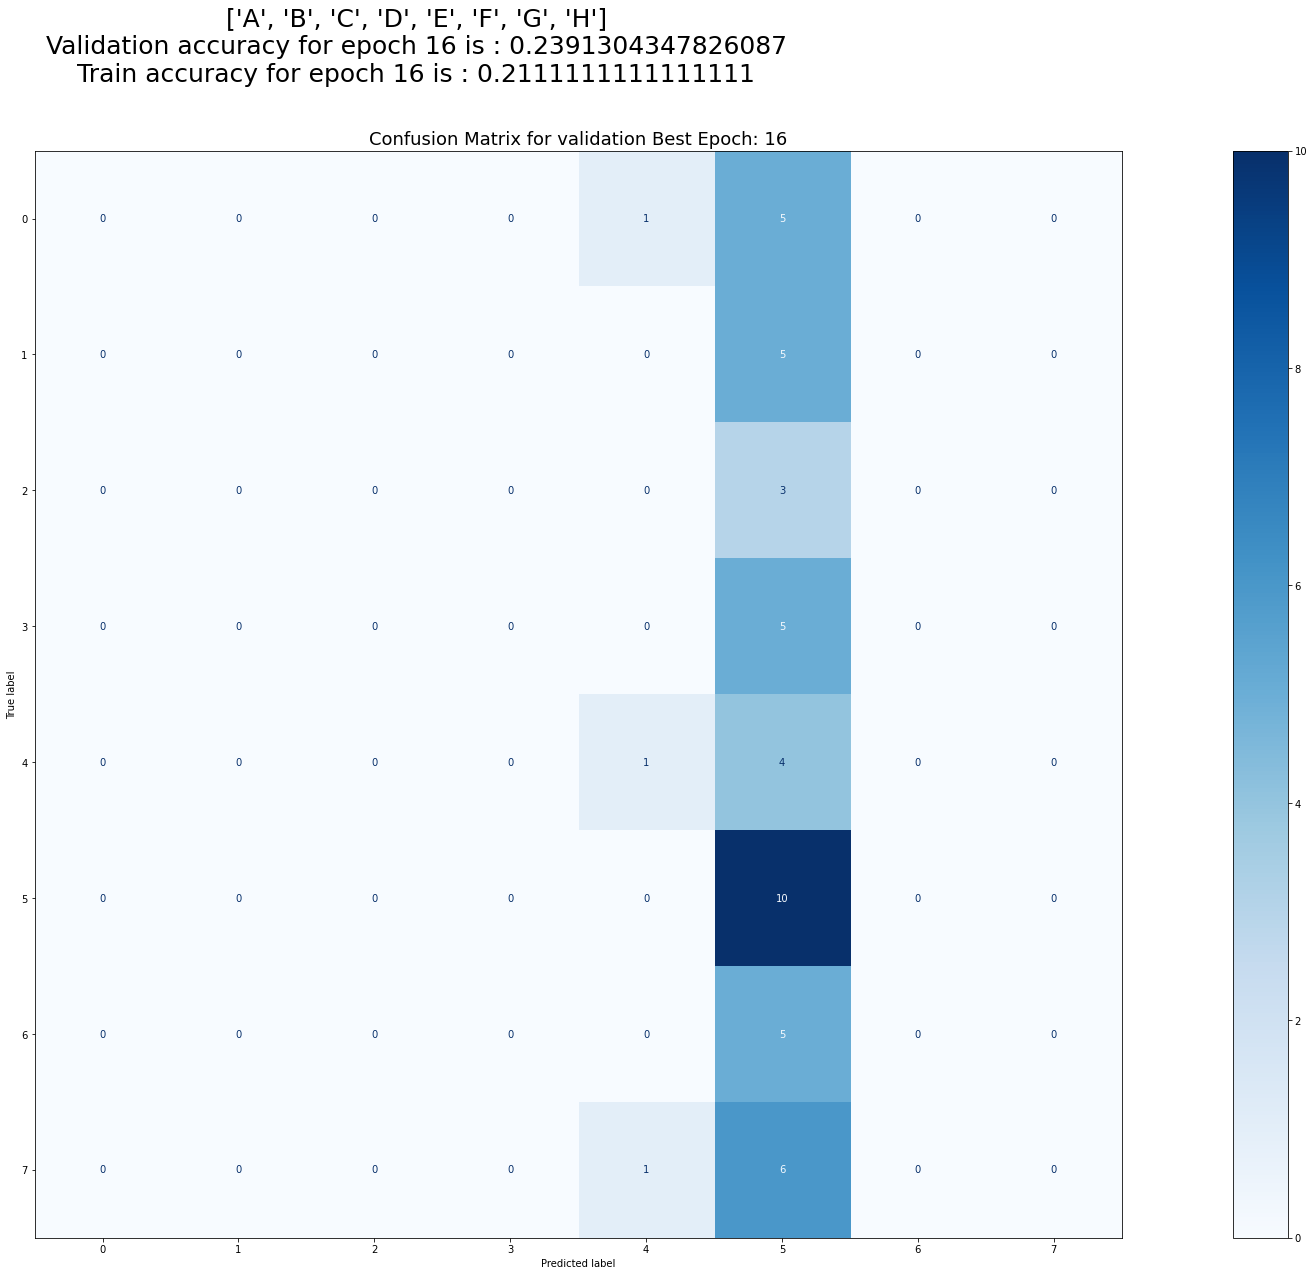

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd,numpy as np
pathtorun=os.getcwd()+"/../csvfiles/"
wandb_name = "mmeignin/embryon_classif/3k10ab0h"
    #figure
fig, axs = plt.subplots(1,1,figsize=(40,20))
    #read_results
summary = (pathtorun+wandb_name).replace("mmeignin/embryon_classif/","")
pf=pd.read_csv(summary+".csv")
    #labels
labels=list(pf['Class'].unique())
    #val and train sets
df_val=pf[pf['step_label']=="val"]
df_train=pf[pf['step_label']=="train"]

    #Get best_epoch
val_per_epoch  = df_val['epoch'].value_counts()
train_per_epoch = df_train['epoch'].value_counts()
val_acc_list=[]
train_acc_list=[]
for i in range(0,val_per_epoch.shape[0]):
        # acc per epoch
        #validation
    val_acc = df_val[df_val['epoch']==i]['accs'].sum()
    val_acc_list.append(val_acc/val_per_epoch[i])
        #training
    train_acc = df_train[df_train['epoch']==i]['accs'].sum()
    train_acc_list.append(train_acc/train_per_epoch[i])
        
best_epoch= np.argmax(val_acc_list)
Summary_list=[]
Summary_list.append(list(map(lambda n: chr(int(n)+65), sorted(labels))))
Summary_list.append(f"Validation accuracy for epoch {best_epoch} is : {val_acc_list[best_epoch]}")
Summary_list.append(f"Train accuracy for epoch {best_epoch} is : {train_acc_list[best_epoch]}")
plt.suptitle(f'{Summary_list[0]}\n{Summary_list[1]}\n{Summary_list[2]}', fontsize=25)
    #Confusion Matrix
axs.set_title(f"Confusion Matrix for validation Best Epoch: {best_epoch}",fontsize=18)
cm=confusion_matrix(df_val['Class'][df_val['epoch']==best_epoch], df_val['preds'][df_val['epoch']==best_epoch],labels=labels) 
ConfusionMatrixDisplay(cm).plot(ax=axs,cmap='Blues')

In [43]:
def run_summary(pathtorun,wandb_name):
    #imports
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    import pandas as pd,numpy as np
    #figure
    fig, axs = plt.subplots(1,1,figsize=(40,20))
    #read_results
    summary = (pathtorun+wandb_name).replace("mmeignin/embryon_classif/","")
    pf=pd.read_csv(summary+".csv")
    #labels
    labels=list(pf['Class'].unique())
    #val and train sets
    df_val=pf[pf['step_label']=="val"]
    df_train=pf[pf['step_label']=="train"]
    
    #Get best_epoch
    val_per_epoch  = df_val['epoch'].value_counts()
    train_per_epoch = df_train['epoch'].value_counts()
    val_acc_list=[]
    train_acc_list=[]
    for i in range(0,val_per_epoch.shape[0]):
        # acc per epoch
        #validation
        val_acc = df_val[df_val['epoch']==i]['accs'].sum()
        val_acc_list.append(val_acc/val_per_epoch[i])
        #training
        train_acc = df_train[df_train['epoch']==i]['accs'].sum()
        train_acc_list.append(train_acc/train_per_epoch[i])
        
    best_epoch= np.argmax(val_acc_list)
    
    #Run Summary
    Summary_list=[]
    Summary_list.append(list(map(lambda n: chr(int(n)+65), sorted(labels))))
    Summary_list.append(f"Validation accuracy for epoch {best_epoch} is : {val_acc_list[best_epoch]}")
    Summary_list.append(f"Train accuracy for epoch {best_epoch} is : {train_acc_list[best_epoch]}")
    plt.suptitle(f'{Summary_list[0]}\n{Summary_list[1]}\n{Summary_list[2]}', fontsize=25)
    #Confusion Matrix
    axs.set_title(f"Confusion Matrix for validation Best Epoch: {best_epoch}",fontsize=18)
    cm=confusion_matrix(df_val['Class'][df_val['epoch']==best_epoch], df_val['preds'][df_val['epoch']==best_epoch],labels=labels) 
    ConfusionMatrixDisplay(cm).plot(ax=axs,cmap='Blues')
    return fig
    

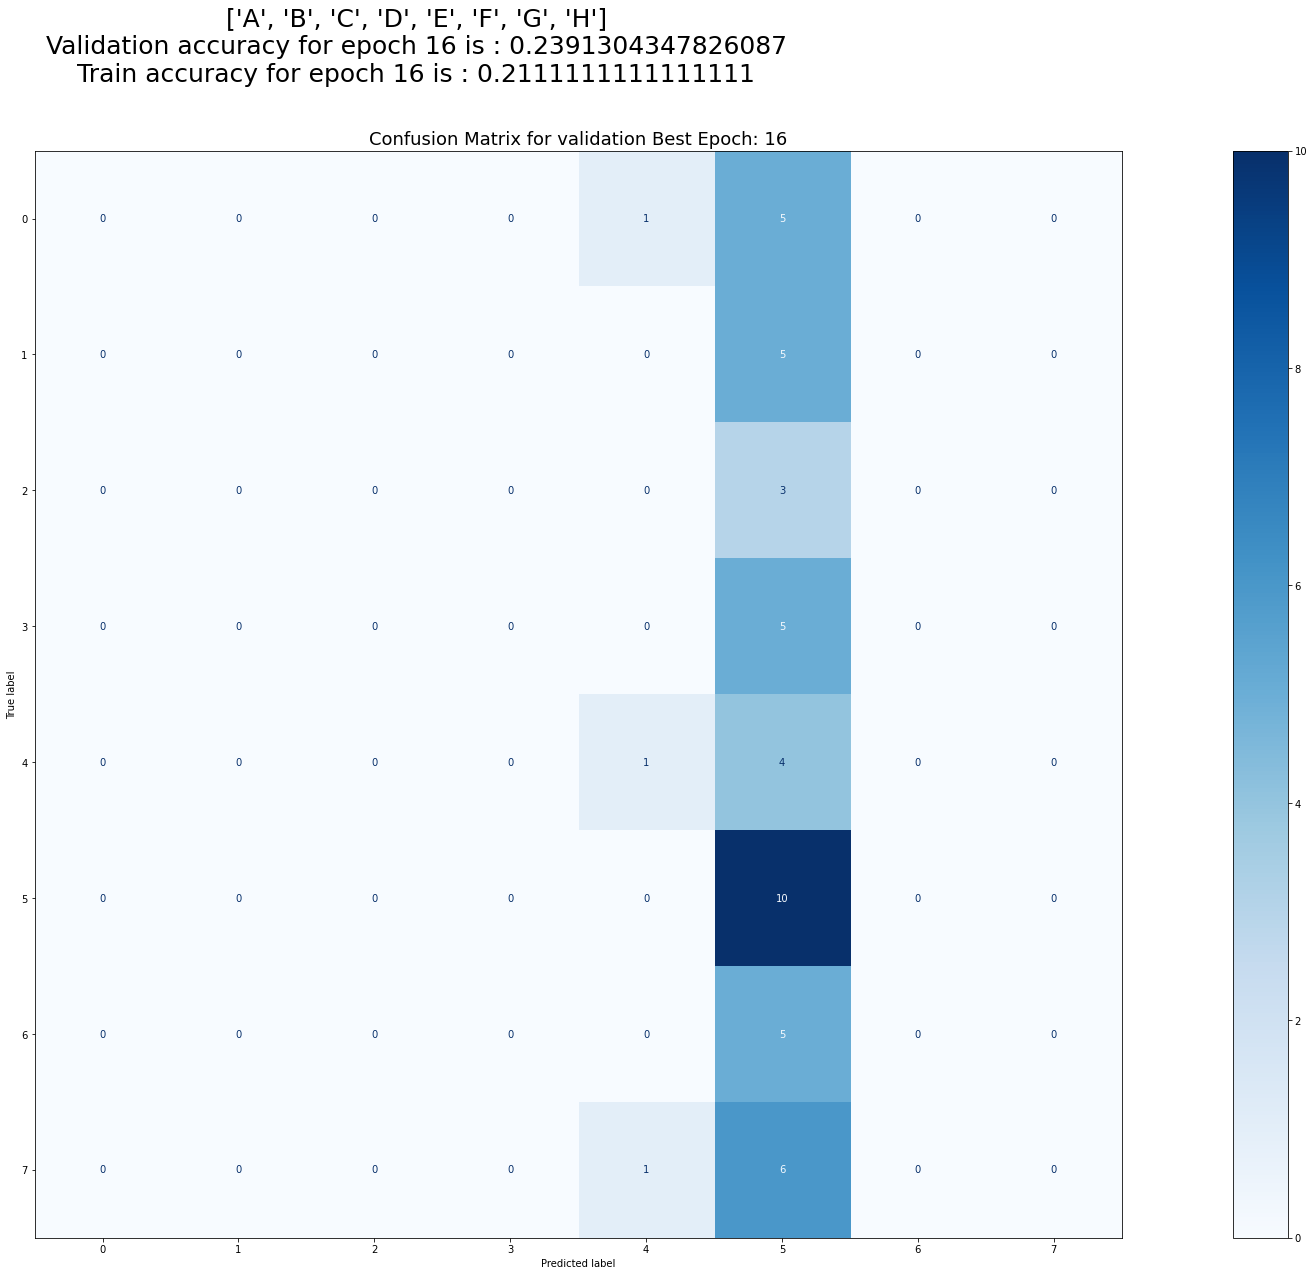

In [44]:
import os
path=os.getcwd()+"/../csvfiles/"
wandb_name = "mmeignin/embryon_classif/3k10ab0h"
a=run_summary(path,wandb_name)
fig_path=os.getcwd()+"/"+wandb_name.split("/")[-1]+"/"
if not(os.path.isdir(fig_path)):
    os.mkdir(fig_path)
fig_name = fig_path +"/Run_summary_and_confusion_matrix.png"
a.savefig(fig_name,facecolor='white',bbox_inches="tight")

KeyError: 0

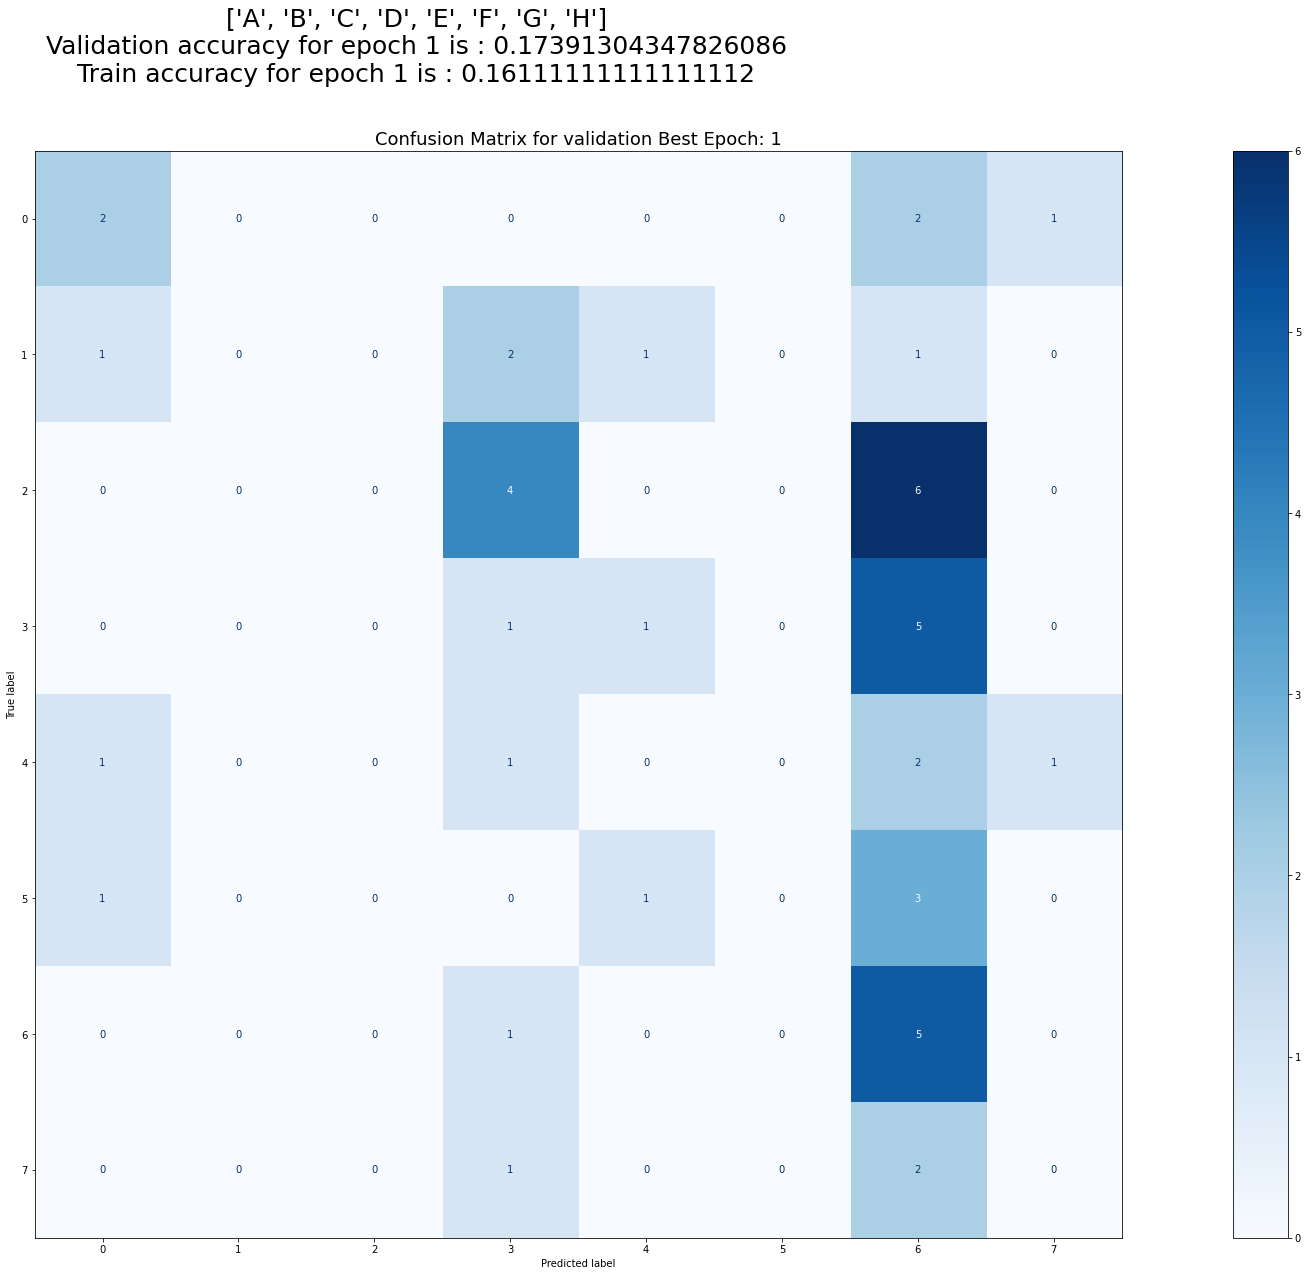

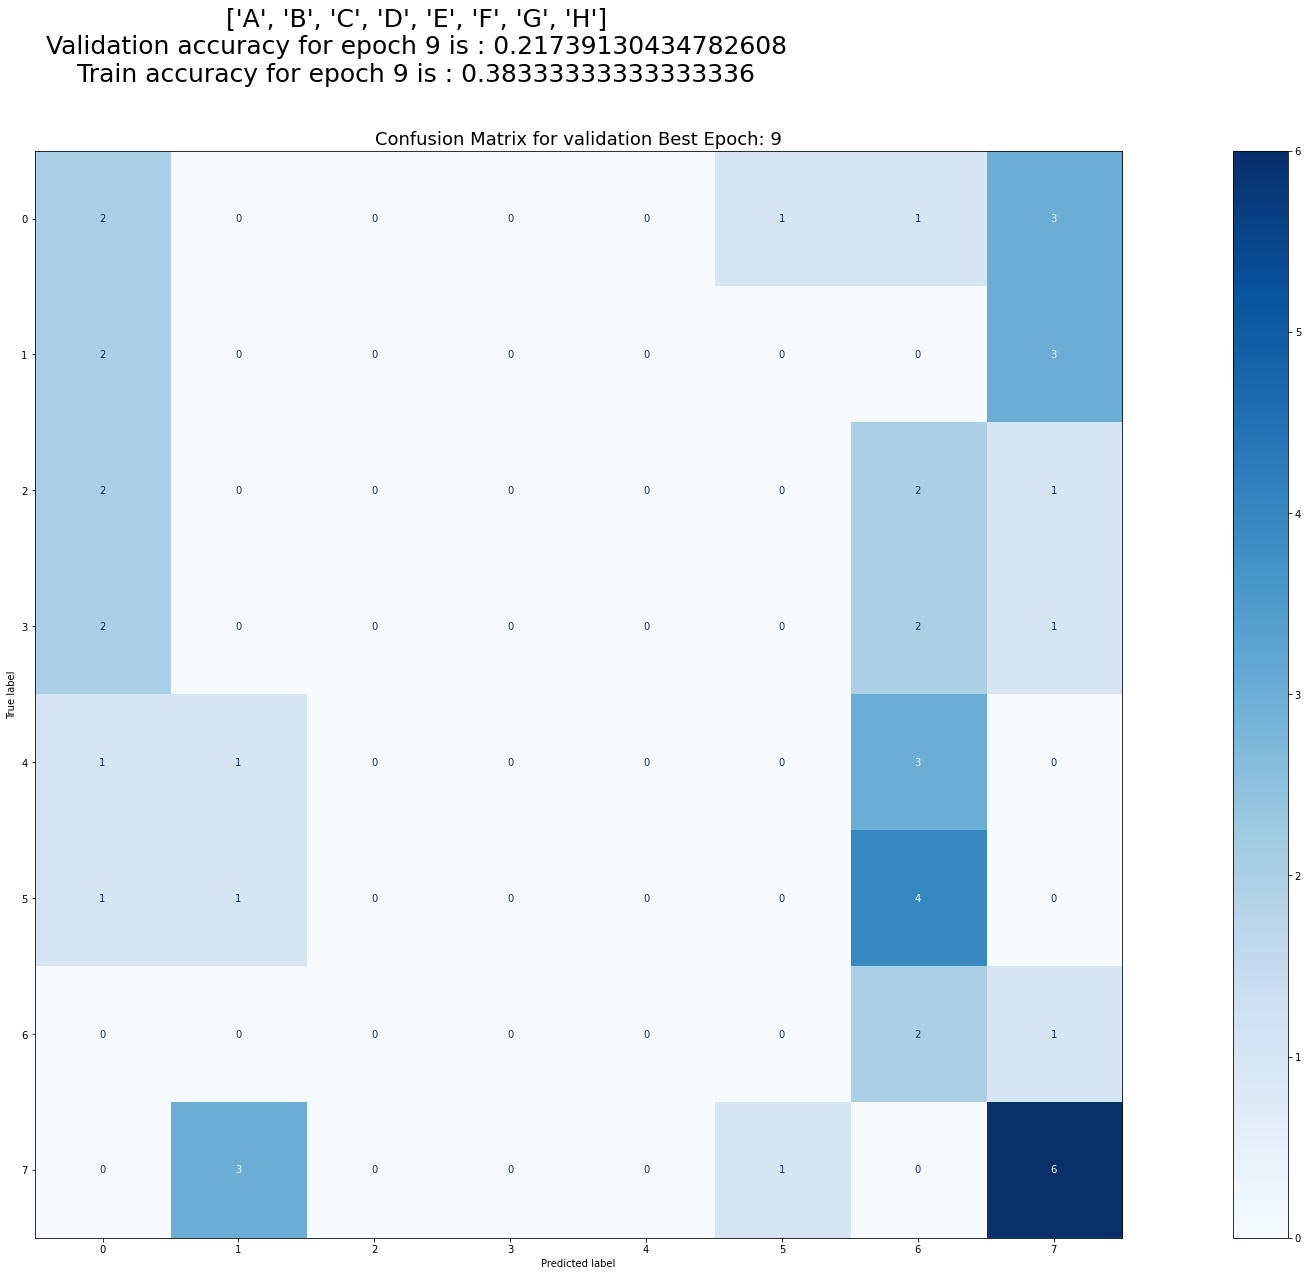

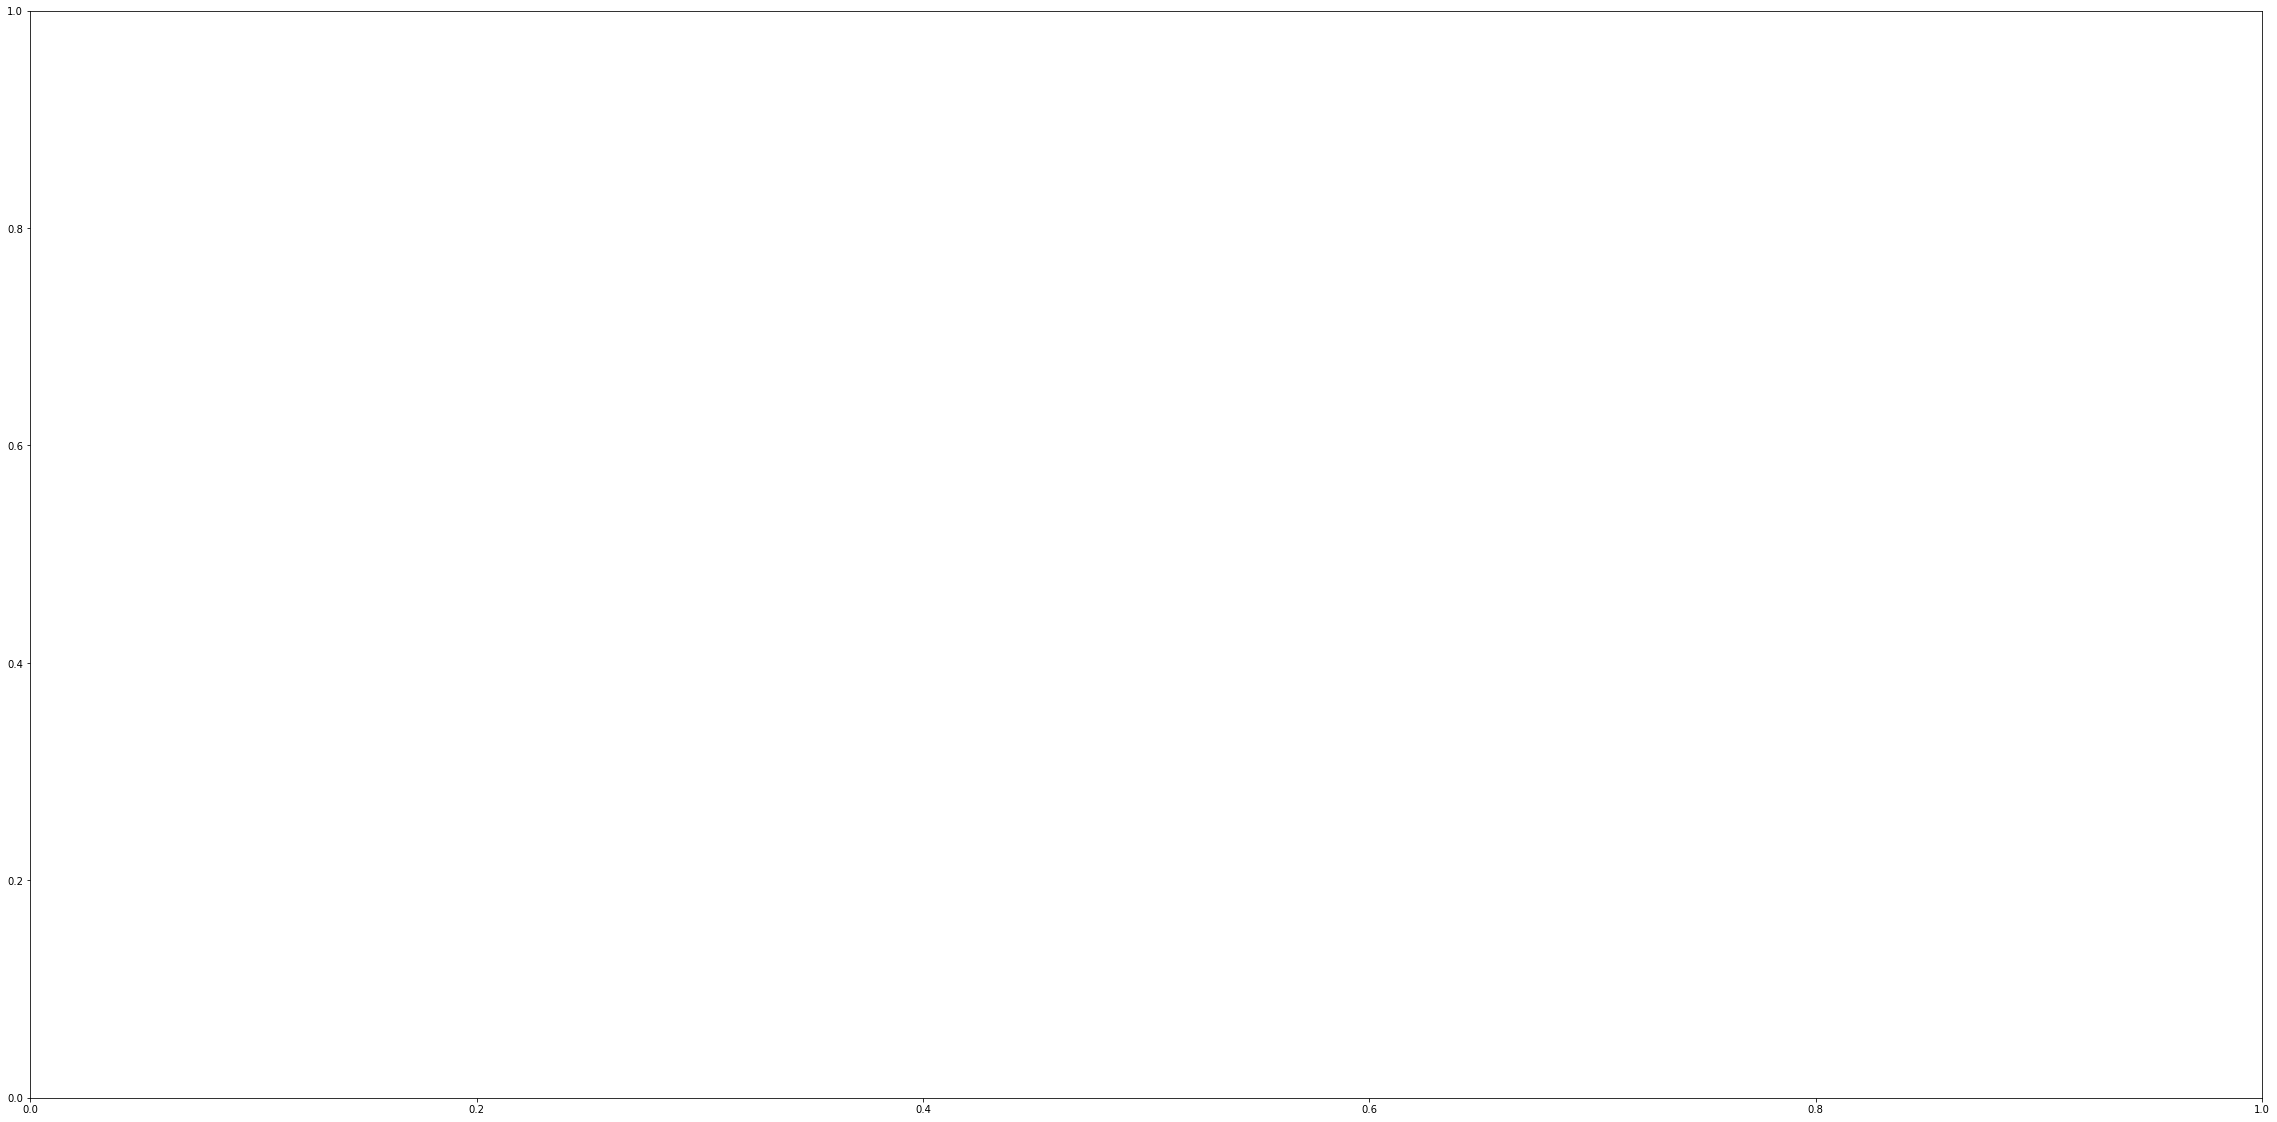

In [7]:
import os
path=os.getcwd()+"/../csvfiles/"
for i in os.listdir(path):
    wandb_name=i
    wandb_name = wandb_name.replace(".csv","")
    a=run_summary(path,wandb_name)
    fig_path=os.getcwd()+"/"+"results/"+wandb_name.split("/")[-1]+"/"
    if not(os.path.isdir(fig_path)):
        os.mkdir(fig_path)
    fig_name = fig_path +"/Run_summary_and_confusion_matrix.png"
    a.savefig(fig_name,facecolor='white',bbox_inches="tight")

In [39]:
import os,pandas as pd
path=os.getcwd()+"/../csvfiles/"
for b in os.listdir(path):
    df=pd.read_csv(path+b)
    break
for i in 
a=df[df['epoch']==0][df['step_label']=='val']['file_name']
print(len(a))
print(a[a.duplicated(keep=False)])


48
0      V183
1      V238
185    V183
212    V238
Name: file_name, dtype: object


<ipython-input-39-34034a66c902>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a=df[df['epoch']==0][df['step_label']=='val']['file_name']


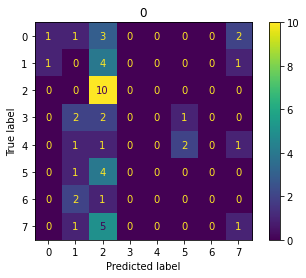

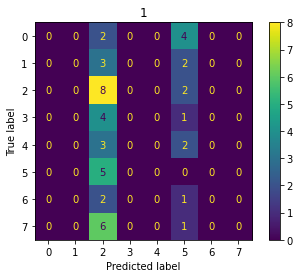

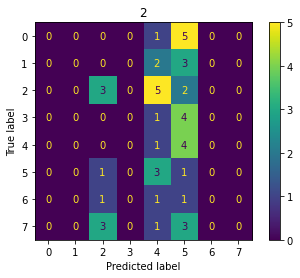

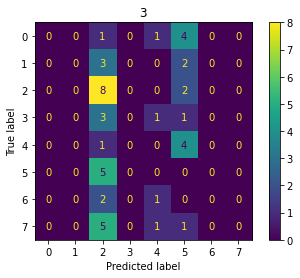

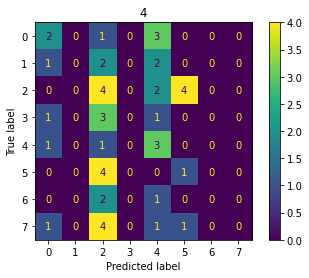

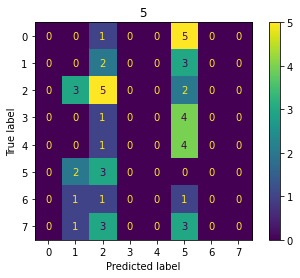

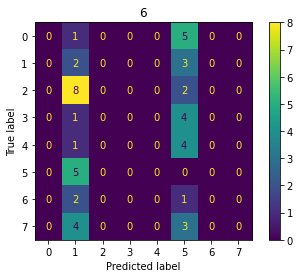

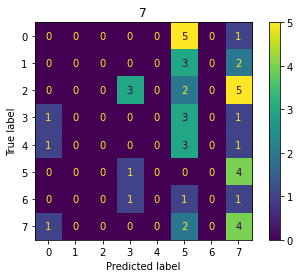

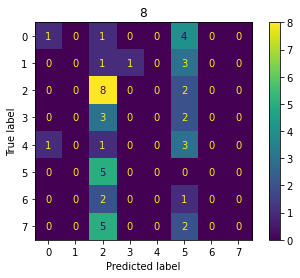

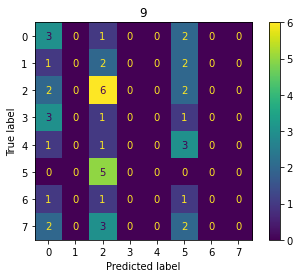

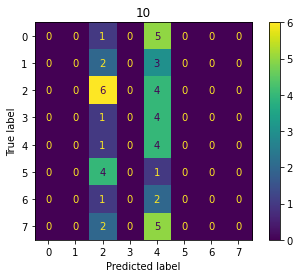

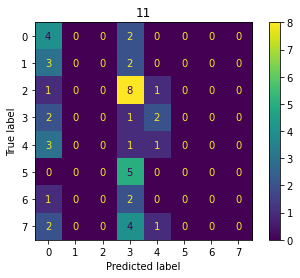

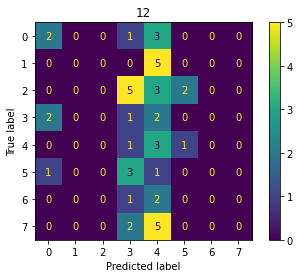

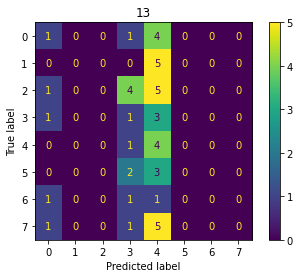

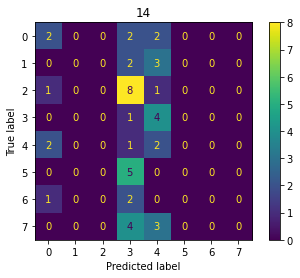

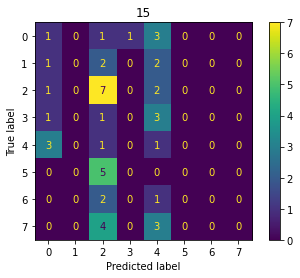

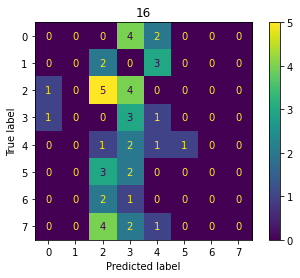

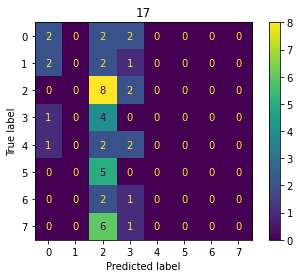

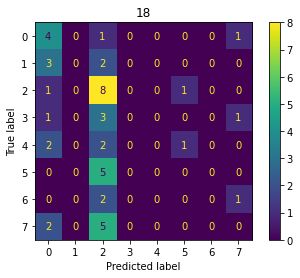

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd,numpy as np
    
for i in df_val['epoch'].unique():
    cm=confusion_matrix(df_val['Class'][df_val['epoch']==i], df_val['preds'][df_val['epoch']==i],labels=df_val['Class'].unique())
    m_display = ConfusionMatrixDisplay(cm)
    m_display.plot()
    plt.title(i)
    plt.show()


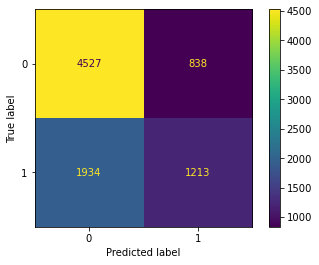

In [58]:
Class=df['Class']
Pred=df['preds']
cm=confusion_matrix(Class,Pred,labels=[0,1])
m_display = ConfusionMatrixDisplay(cm).plot()

In [33]:
import numpy as np
features =np.arange(1*300*512).reshape(1,300,512)
embedding = np.zeros((1,300)).reshape(1,300,1)
print(features.shape)
print(embedding.shape)
embedding[0]=24
for i in range(embedding.shape[1]):
    embedding[0,i,0]=embedding[0,0,0]+0.15*i*300/embedding.shape[1]
print(embedding)
features = features + embedding


(1, 300, 512)
(1, 300, 1)
[[[24.  ]
  [24.15]
  [24.3 ]
  [24.45]
  [24.6 ]
  [24.75]
  [24.9 ]
  [25.05]
  [25.2 ]
  [25.35]
  [25.5 ]
  [25.65]
  [25.8 ]
  [25.95]
  [26.1 ]
  [26.25]
  [26.4 ]
  [26.55]
  [26.7 ]
  [26.85]
  [27.  ]
  [27.15]
  [27.3 ]
  [27.45]
  [27.6 ]
  [27.75]
  [27.9 ]
  [28.05]
  [28.2 ]
  [28.35]
  [28.5 ]
  [28.65]
  [28.8 ]
  [28.95]
  [29.1 ]
  [29.25]
  [29.4 ]
  [29.55]
  [29.7 ]
  [29.85]
  [30.  ]
  [30.15]
  [30.3 ]
  [30.45]
  [30.6 ]
  [30.75]
  [30.9 ]
  [31.05]
  [31.2 ]
  [31.35]
  [31.5 ]
  [31.65]
  [31.8 ]
  [31.95]
  [32.1 ]
  [32.25]
  [32.4 ]
  [32.55]
  [32.7 ]
  [32.85]
  [33.  ]
  [33.15]
  [33.3 ]
  [33.45]
  [33.6 ]
  [33.75]
  [33.9 ]
  [34.05]
  [34.2 ]
  [34.35]
  [34.5 ]
  [34.65]
  [34.8 ]
  [34.95]
  [35.1 ]
  [35.25]
  [35.4 ]
  [35.55]
  [35.7 ]
  [35.85]
  [36.  ]
  [36.15]
  [36.3 ]
  [36.45]
  [36.6 ]
  [36.75]
  [36.9 ]
  [37.05]
  [37.2 ]
  [37.35]
  [37.5 ]
  [37.65]
  [37.8 ]
  [37.95]
  [38.1 ]
  [38.25]
  [38.4 ]
  [3